<a href="https://colab.research.google.com/github/roman-mikhaylov/repo_sinergiya/blob/main/ML_5_13_Mikhaylov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

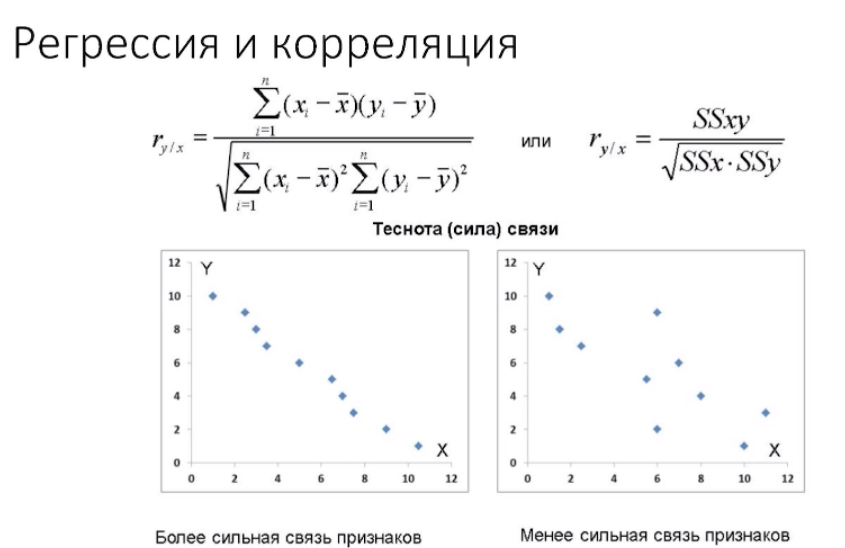

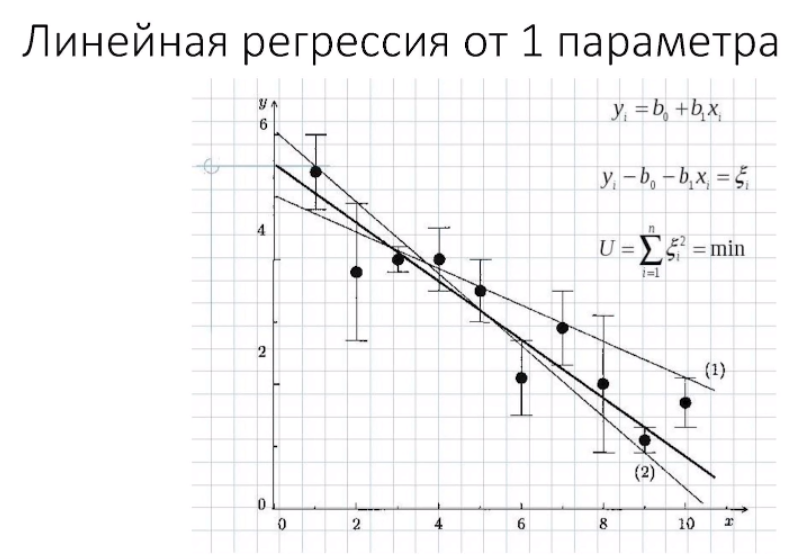

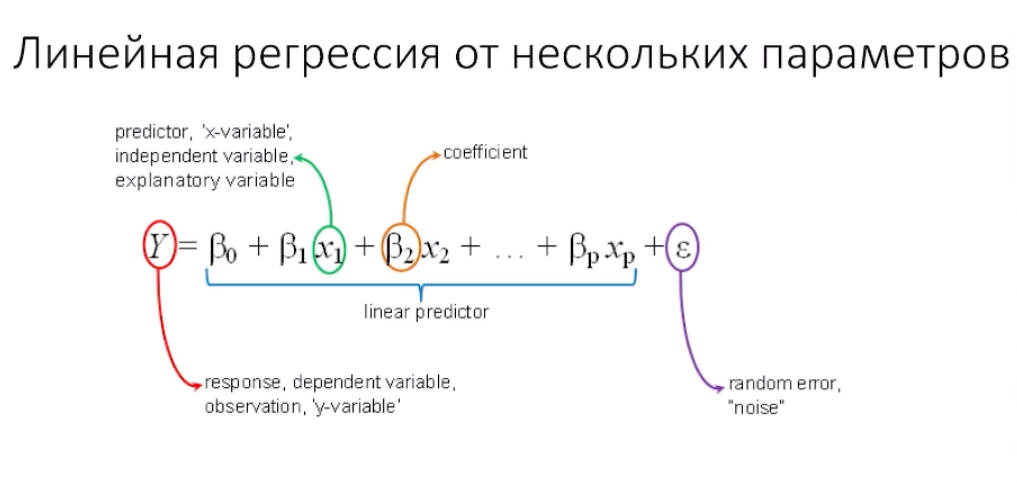

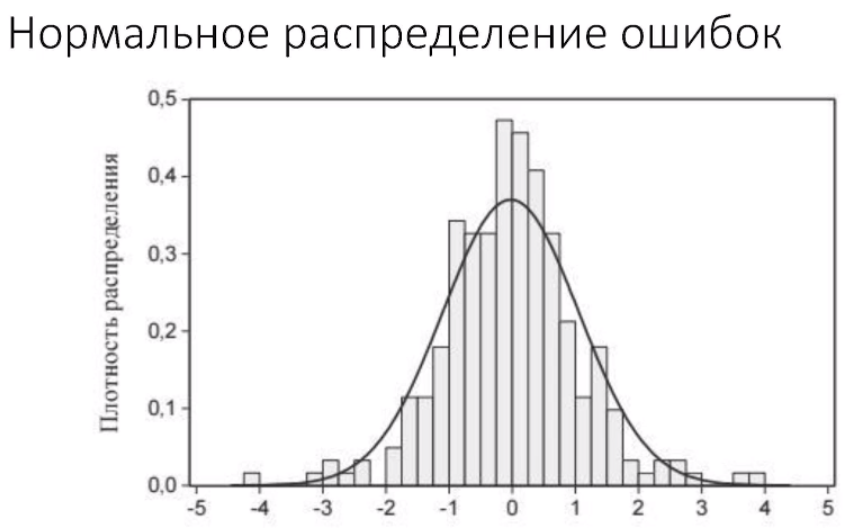

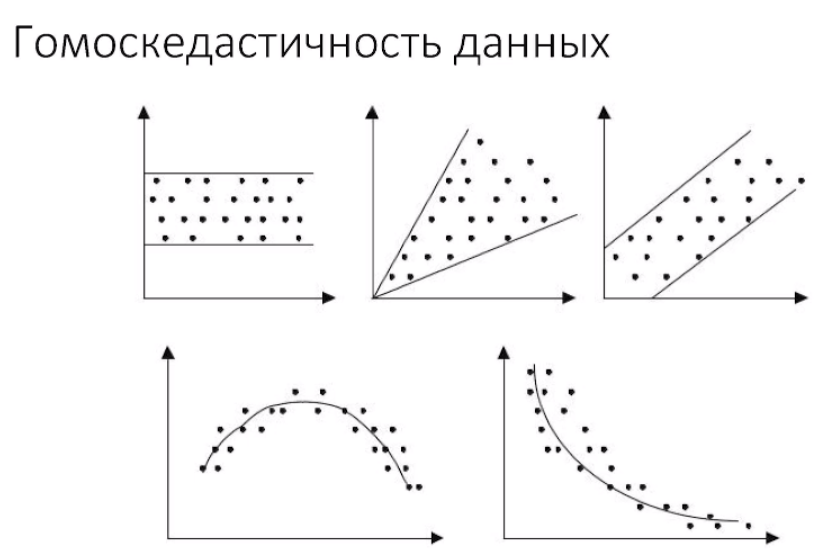

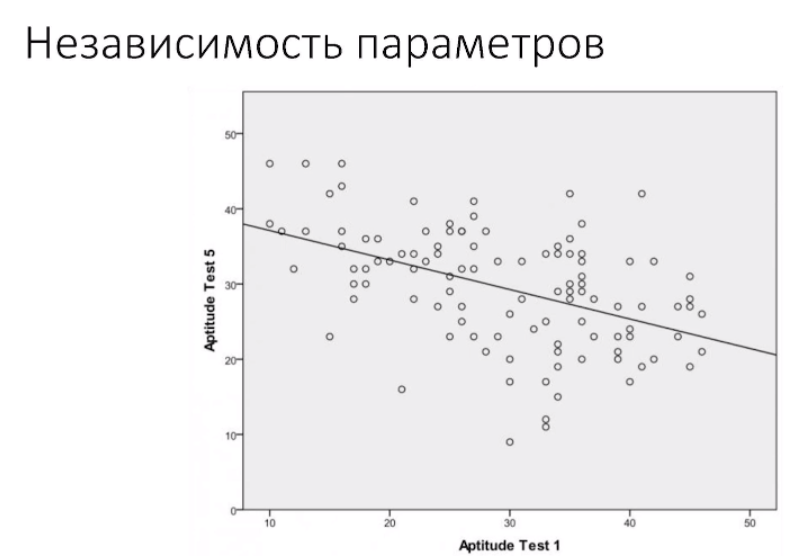

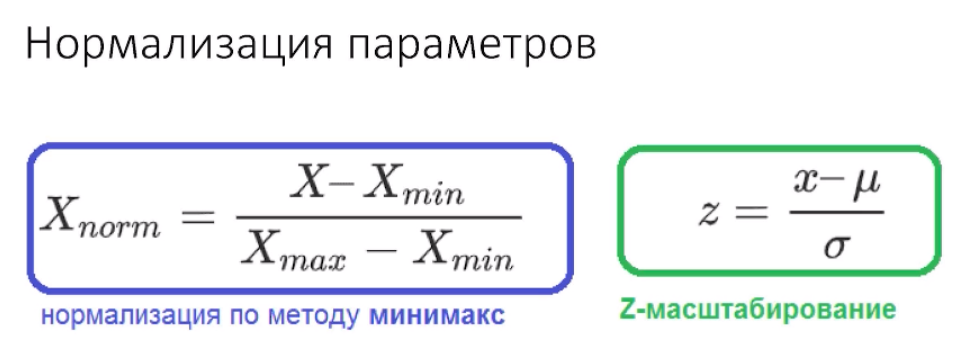

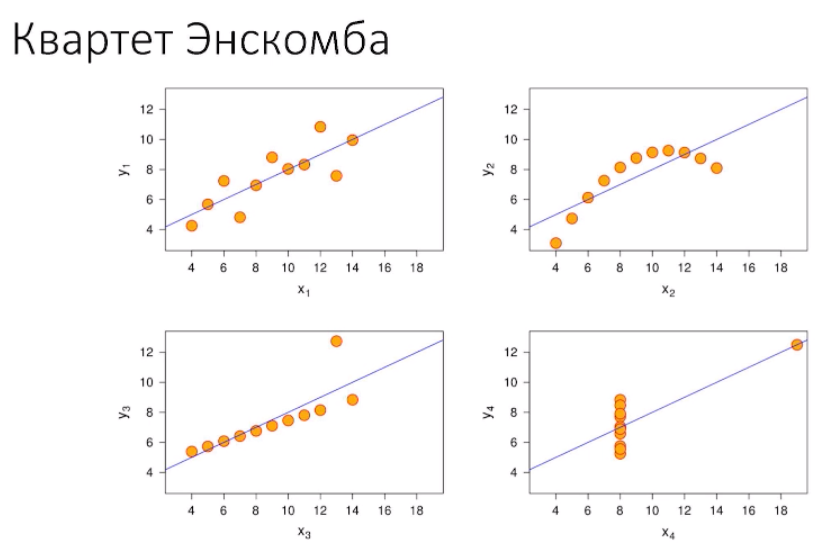

практикум

линейная регрессия

In [2]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/energy_3.csv')
data.head()

,Unnamed: 0,timestamp,meter_reading,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_speed,air_temperature1,wind_direction_sin,wind_direction_cos,hour,day
0,0,2016-01-30 08:00:00,43.6839,8.3,0.0,6.1,0.0,1019.0,2.1,-2.3,-0.642788,-0.766044,8,30
1,1,2016-01-31 05:00:00,37.5408,12.8,0.0,10.0,0.0,1021.9,0.0,-1.1,0.000000,1.000000,5,31
2,2,2016-01-31 17:00:00,52.5571,20.6,0.0,11.7,0.0,1020.9,1.5,1.7,0.939693,-0.342020,17,31
3,3,2016-04-08 14:00:00,59.3827,21.7,2.0,14.4,0.0,1015.1,3.1,2.8,-0.939693,-0.342020,14,8
4,4,2016-05-01 19:00:00,448.0000,31.1,0.0,17.2,0.0,1016.1,4.1,1.1,0.984808,-0.173648,19,1


нормализация параметров: температура воздуха и давление

In [4]:
data_norm = MinMaxScaler().fit_transform(data[["air_temperature", "sea_level_pressure"]])
df = pd.DataFrame(data_norm) # переведем в пандас датафрейм для удобства
df = df.rename(columns={0: 'air_temperature', 1: "sea_level_pressure" } )
df

,air_temperature,sea_level_pressure
0,0.106109,0.739726
1,0.250804,0.819178
2,0.501608,0.791781
3,0.536977,0.632877
4,0.839228,0.660274
...,...,...
5406,0.572347,0.813699
5407,0.588424,0.794521
5408,0.588424,0.797260
5409,0.572347,0.797260


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5411 entries, 0 to 5410
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   air_temperature     5411 non-null   float64
 1   sea_level_pressure  5383 non-null   float64
dtypes: float64(2)
memory usage: 84.7 KB


кол-во не нулевых значений не совпадает. заполняем Nan в столбце sea_level_pressure интерполяцией

In [6]:
df['sea_level_pressure'] = df['sea_level_pressure'].interpolate()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5411 entries, 0 to 5410
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   air_temperature     5411 non-null   float64
 1   sea_level_pressure  5411 non-null   float64
dtypes: float64(2)
memory usage: 84.7 KB


In [8]:
data_norm = df.to_numpy() # jобратно в numpy
data_norm

array([[0.10610932, 0.73972603],
       [0.25080386, 0.81917808],
       [0.50160772, 0.79178082],
       ...,
       [0.58842444, 0.79726027],
       [0.57234727, 0.79726027],
       [0.50160772, 0.79726027]])

meter_reading = a * air_temperature + b * sea_level_pressure + c

In [9]:
x = data_norm
y = data['meter_reading']
model = LinearRegression().fit(x, y)
print('meter_reading =', int(model.coef_[0]), '* air_temperature -',
      int(model.coef_[1]*(-1)),'* sea_level_pressure + ', int(model.intercept_))

meter_reading = 141 * air_temperature - 56 * sea_level_pressure +  186


In [10]:
model

LinearRegression()

**Ошибка модели**

RMSLE

In [11]:
err_rmsle = (np.log(1 + data['meter_reading']) - np.log(1 + model.predict(data_norm)))**2
print ('RMSLE: {0:.5}'. format(np.array(err_rmsle).mean()**0.5))

RMSLE: 0.22008


***Задание спикера***

1. построить 24 модели линейной регрессии от температуры и давления по часам

In [25]:
ensamble = []
for h in range(24):
  data1 =  data.loc[data['hour'] == h]
  scaler = MinMaxScaler().fit_transform(data1[["air_temperature", "sea_level_pressure"]])
  df = pd.DataFrame(scaler)
  df[1] = df[1].interpolate()
  data_norm1 = df.to_numpy()
  x = data_norm1
  y = data1['meter_reading']
  model = LinearRegression().fit(x, y)
  ensamble.append(model)
print (ensamble)

[LinearRegression(), LinearRegression(), LinearRegression(), LinearRegression(), LinearRegression(), LinearRegression(), LinearRegression(), LinearRegression(), LinearRegression(), LinearRegression(), LinearRegression(), LinearRegression(), LinearRegression(), LinearRegression(), LinearRegression(), LinearRegression(), LinearRegression(), LinearRegression(), LinearRegression(), LinearRegression(), LinearRegression(), LinearRegression(), LinearRegression(), LinearRegression()]


2. Вычислить RMSLE для этого ансамбля моделей регресии

In [27]:
err_rmsle = []
for h in range(24):

  err_rmsle.extend(((np.log(1 + data['meter_reading']) - np.log(1 + model.predict(data_norm)))**2).values)

  #err_rmsle.extend(((np.log(1+ensamble[h]) - np.log(1+data.loc[data['hour'] == h]['meter_reading']))**2).values)
print ('RMSLE: {0:.5}'. format(np.array(err_rmsle).mean()**0.5))

RMSLE: 0.22092


***Практическое задание***

1. Определение линейной регрессии

Линейная регрессия – это модель линейной зависимости одной (зависимой) переменной от другой или нескольких.
Линейная регрессия - это метод машинного обучения, используемый для предсказания непрерывных целевых переменных на основе определенных независимых переменных (также известных как “предикторы” или “входные переменные”). Она помогает понять взаимосвязь между входными переменными и целевой переменной, предсказывая значение целевой переменной на основе значений входных переменных. Линейная регрессия делает это путем подгонки прямой линии к набору данных, где точки данных представляют собой входные переменные и соответствующие целевые значения.



2.Приведите пример простой линейной регрессии.

Пример простой линейной регрессии может быть следующим:

Имеется набор данных, состоящий из пар значений (x, y), где x - независимая переменная (например, время), а y - зависимая переменная (например, температура).

Требуется построить модель, которая позволит предсказывать значение y по заданному значению x.
Для построения модели используется линейная регрессия. В данном случае модель будет иметь вид y = ax + b, где a и b - коэффициенты, которые нужно определить.

Для определения коэффициентов a и b используется метод наименьших квадратов. Он заключается в том, чтобы найти такие значения коэффициентов, при которых сумма квадратов разностей между предсказанными значениями y (ax + b) и реальными значениями y была бы минимальной.

После определения коэффициентов a и b модель готова к
использованию. По заданному значению x можно предсказать значение y, используя формулу y = ax + b.

In [4]:
from sklearn.linear_model import LinearRegression
import numpy as np

x = np.array([[1, 2], [3, 4]])
y = np.array([5, 7])

reg = LinearRegression()
reg.fit(x, y)
print(reg.coef_)  # коэффициенты линейной функции
print(reg.intercept_)  # свободный член линейной функции
print('y =', reg.coef_[0], '* x +',
      int(reg.intercept_))

[0.5 0.5]
3.5000000000000004
y = 0.5 * x + 3


3.В каких случаях можно применять линейную регрессию?

Когда мы имеем дело с нормальным распределением ошибок (распределение Гаусса)
б) Гомоскедантичность данных.
в) Независимость параметров, по которым строится линейная регрессия.
г) Линейная регрессия хорошо работает, если есть нормализация параметров.
